In [83]:
#coding=utf-8

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [84]:
# Загрузка данных
path_to_csv = 'MSFT(2000-2023).csv'
msftStock = pd.read_csv(path_to_csv)

In [85]:
# Преобразование столбца 'Date' в формат datetime
msftStock['Date'] = pd.to_datetime(msftStock['Date'])
msftStock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,58.68750,59.3125,56.00000,58.28125,36.132248,53228400
1,2000-01-04,56.78125,58.5625,56.12500,56.31250,34.911709,54119000
2,2000-01-05,55.56250,58.1875,54.68750,56.90625,35.279816,64059600
3,2000-01-06,56.09375,56.9375,54.18750,55.00000,34.098019,54976600
4,2000-01-07,54.31250,56.1250,53.65625,55.71875,34.543629,62013600


In [86]:
# Фильтрация данных по году
year = 2020
mask = msftStock['Date'].dt.year == year
msftStockYear = msftStock[mask]

In [87]:
# Очистка данных от выбросов
Q1 = msftStockYear.quantile(0.25)
Q3 = msftStockYear.quantile(0.75)
IQR = Q3 - Q1
msftStockYear = msftStockYear[~((msftStockYear < (Q1 - 1.5 * IQR)) | (msftStockYear > (Q3 + 1.5 * IQR))).any(axis=1)]

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

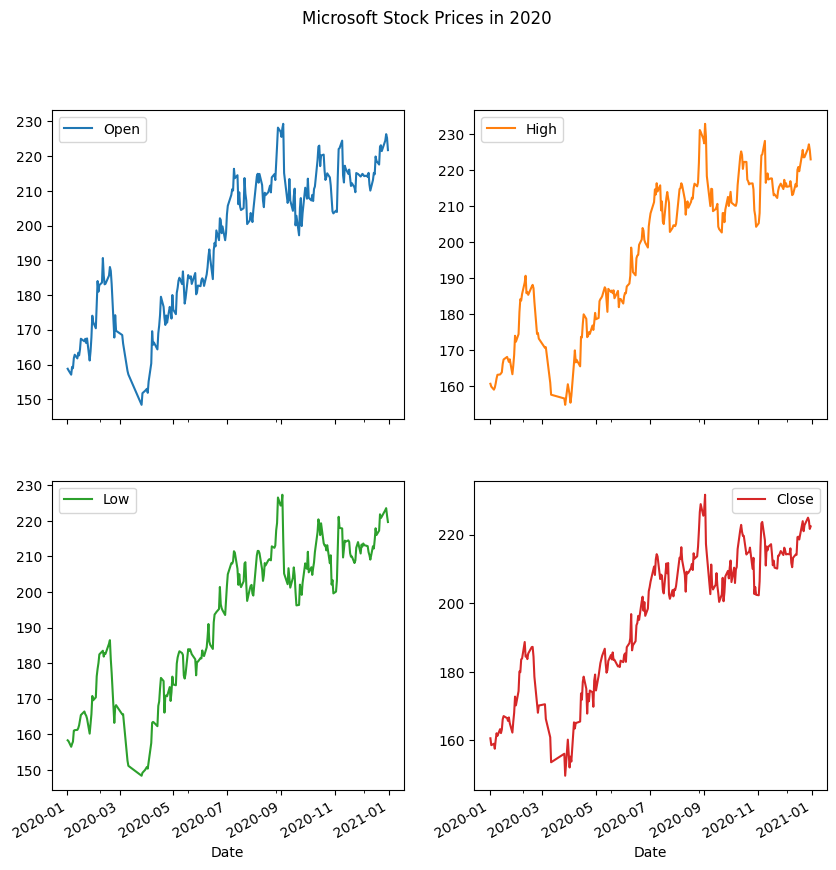

In [88]:
# Визуализация данных
msftStockYear.plot(x='Date', y=['Open', 'High', 'Low', 'Close'], subplots=True, layout=(2, 2), figsize=(10, 10), title='Microsoft Stock Prices in ' + str(year))

,Date,Open,High,Low,Close,Adj Close,Volume
5031,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779510,22622100
5032,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200
5033,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247375,20813700
5034,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850113,21634100
5035,2020-01-08,158.929993,160.800003,157.949997,160.089996,154.268829,27746500


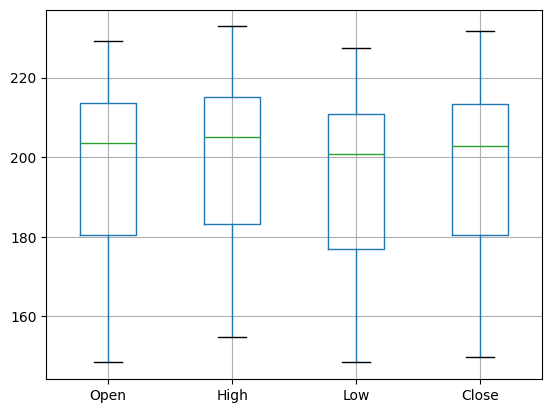

In [89]:
# Разброс значений основных показателей
msftStockYear[['Open', 'High', 'Low', 'Close']].boxplot()
msftStockYear.head()

<Axes: >

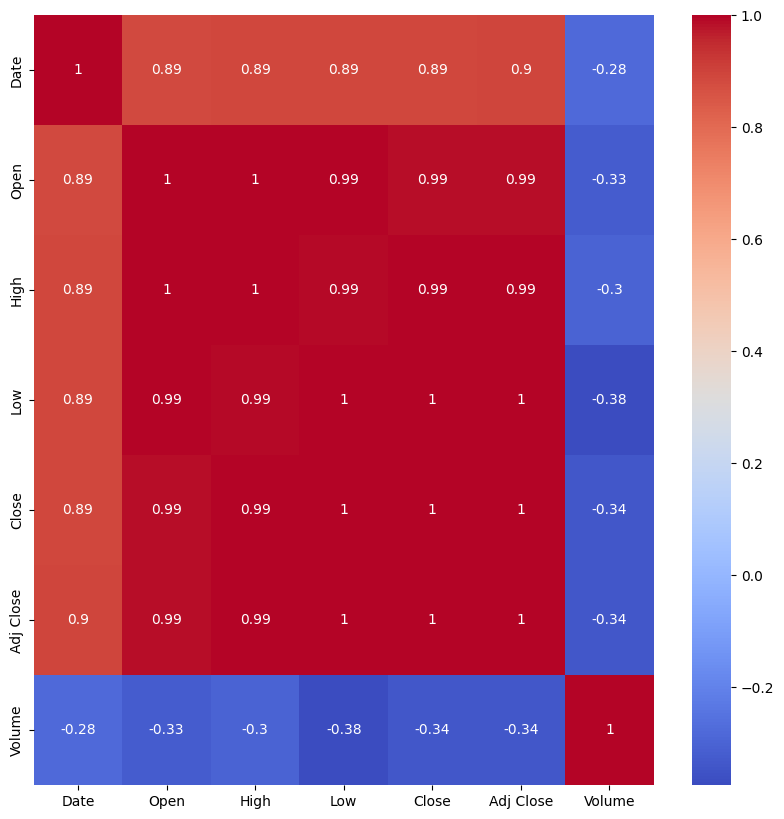

In [90]:
# Тепловая карта для выявления корреляций между показателями
plt.figure(figsize=(10,10))
sns.heatmap(msftStockYear.corr(), annot=True, cmap='coolwarm')

<Axes: title={'center': 'Low Prices vs High Prices'}, xlabel='High'>

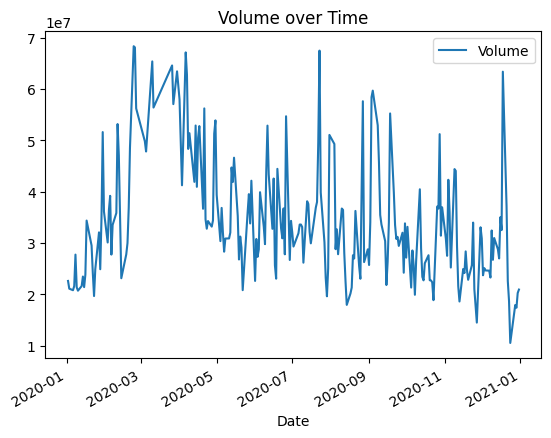

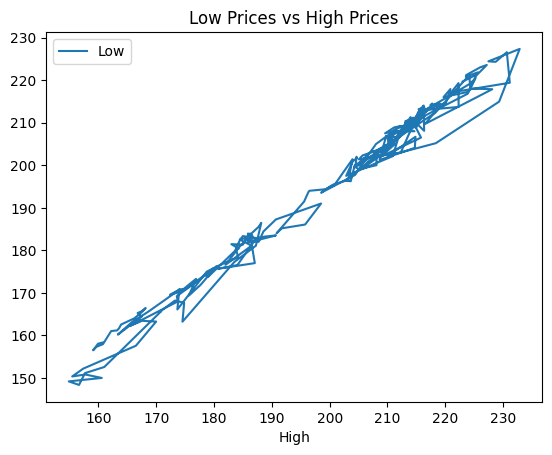

In [91]:
# Графики зависимостей
msftStockYear.plot(x='Date', y='Volume', title='Volume over Time')
msftStockYear.plot(x='High', y='Low', title='Low Prices vs High Prices')

In [92]:
# Добавление в датафрейм нового столбца с вычислениями
msftStockYear['PriceChange'] = msftStockYear['Close'] - msftStockYear['Open']
msftStockYear.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PriceChange
5031,2020-01-02,158.779999,160.729996,158.330002,160.619995,154.779510,22622100,1.839996
5032,2020-01-03,158.320007,159.949997,158.059998,158.619995,152.852249,21116200,0.299988
5033,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.247375,20813700,1.949997
5034,2020-01-07,159.320007,159.669998,157.320007,157.580002,151.850113,21634100,-1.740005
5035,2020-01-08,158.929993,160.800003,157.949997,160.089996,154.268829,27746500,1.160003
